<a href="https://colab.research.google.com/github/rhodes-byu/cs-stat-180/blob/main/labs/05-cereal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 5: Cereal Data

## Introduction:


Everyone loves cereal. But have you ever thought deeply about your cereal? Well now is your chance to take a data driven view of your breakfast.

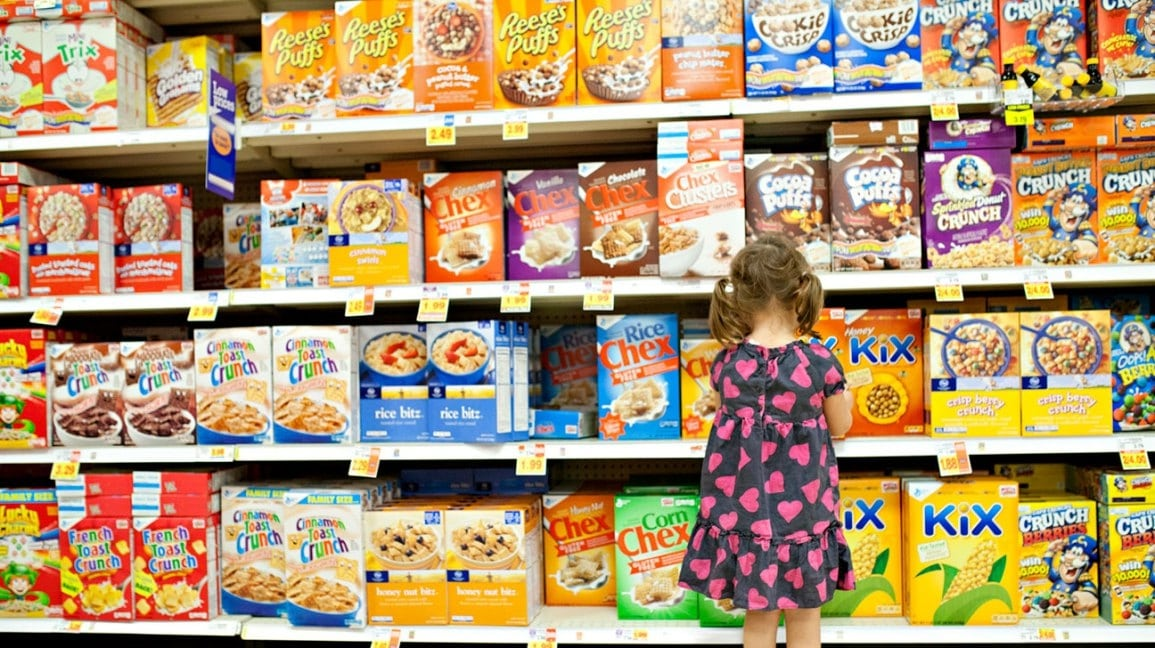


### Getting Started:
Download the data from github. Run the code below to download the data that you'll be using in this lab.

You may use pandas, numpy, matplotlib and/or seaborn for these excercises.

You can use/read their respective documentation in the links below (only if you need too, it's not required for the lab):

*   Seaborn [Documentation]("https://seaborn.pydata.org/tutorial.html")
*   Matplotlib [Documentation]("https://matplotlib.org/stable/api/index.html")
*   Numpy [Documentation]("https://numpy.org/doc/1.23/user/index.html#user")
*   Pandas [Documentation]("https://pandas.pydata.org/docs/user_guide/index.html#user-guide")







In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
cereal = pd.read_csv('https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cereal.csv')
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


## Exercise 1: Protein Powder
Carbs, fats and proteins are the three primary macro nutrients. Create a figure plotting the distribution of each of these macro nutrients together (i.e., three distributions on a single plot). Make sure to provide a legend.

<Axes: xlabel='macro', ylabel='normalized'>

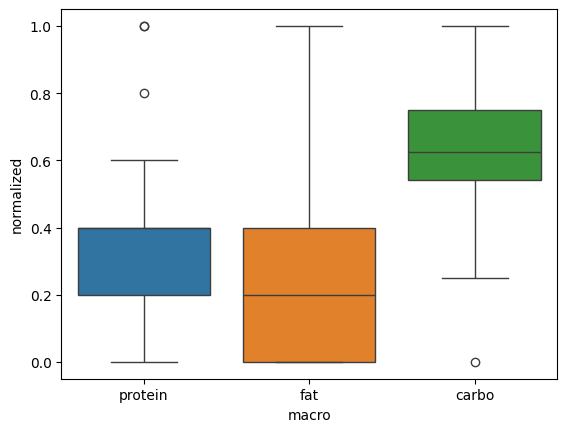

In [2]:
# Enter all of your code for exercise 1 here. Feel free to add more cells if you need to:
macro_n = ['protein', 'fat', 'carbo']
df = cereal[macro_n]
df = (df - df.min()) / (df.max() - df.min())

df = df.reset_index().melt(
    id_vars='index',
    var_name='macro',
    value_name='normalized' 
)

sns.boxplot(data=df, x='macro', y='normalized', hue='macro')

## Exercise 2: Sugar Daddy
Get a list of the top 5 most sugary cereals and the 5 least sugary cereals.

In [32]:
# Enter all of your code for exercise 2 here. Feel free to add more cells if you need to:
most_sug = cereal.sort_values(by='sugars', ascending=False)
least_sug = cereal.sort_values(by='sugars')
most_sug[0:5]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
30,Golden Crisp,P,C,100,2,0,45,0.0,11.0,15,40,25,1,1.00,0.88,35.252444
66,Smacks,K,C,110,2,1,70,1.0,9.0,15,40,25,2,1.00,0.75,31.230054
52,Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594
70,Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.50,1.00,28.592785
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094


In [33]:
least_sug[0:5]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.00,0.67,50.828392
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885


## Exercise 3: Cereal Killer
Get a list of the top 5 highest rated and lowest rated cereals.

In [34]:
# Enter all of your code for exercise 3 here. Feel free to add more cells if you need to:
most_pop = cereal.sort_values(by='rating', ascending=False)
least_pop = cereal.sort_values(by='rating')
most_pop[0:5]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885


In [35]:
least_pop[0:5]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851
12,Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,45,25,2,1.0,0.75,19.823573
35,Honey Graham Ohs,Q,C,120,1,2,220,1.0,12.0,11,45,25,2,1.0,1.00,21.871292
18,Count Chocula,G,C,110,1,1,180,0.0,12.0,13,65,25,2,1.0,1.00,22.396513
14,Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.0,1.00,22.736446


## Exercise 4: America
Quantify the relationship between sugar and ratings.

Make a plot to visualize this relationship. Superimpose a best fit line (with seaborn) to describe the relationship. It may be helpful to look at the [seaborn regplot documentation]("https://seaborn.pydata.org/generated/seaborn.regplot.html").

<Axes: xlabel='rating', ylabel='sugars'>

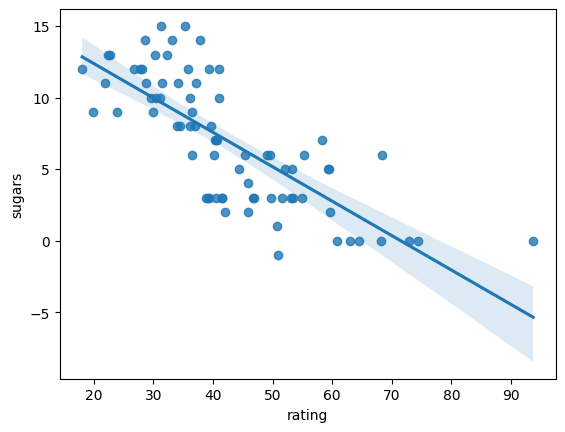

In [ ]:
# Make the plot for the data visualization and line of best fit here:
sns.regplot(data=cereal, x='rating', y='sugars')


Calculate a correlation statistic describing the relationship between sugar and ratings  (i.e., r or r squared).

In [44]:
# Calculate the statistic using this cell:
np.corrcoef(x=cereal['rating'], y=cereal['sugars'])[0][1]

np.float64(-0.7596746584301077)

Write a statement in plain English interpreting this statistic.

Both the graph and the r value show that there is, suprisingly, a negative relation between the sugar and the rating. The more sugar is put into the cereal, the lower the rating. 

## Exercise 5: America Part 2
Make five plots comparing the relationships of carbo, sugars, calories, protein, and fat with rating.

0.052054661233764614
-0.6893760311652585
0.4706184645492595
-0.40928366014781


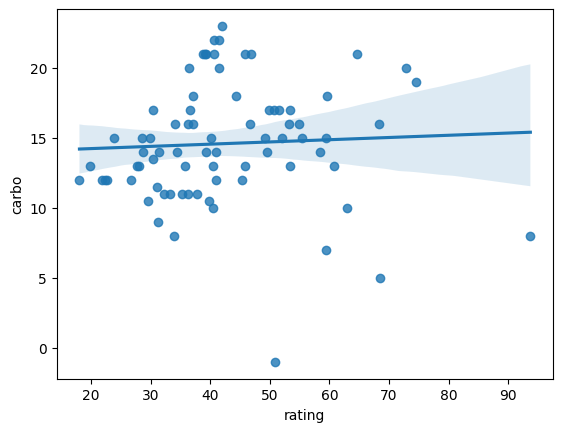

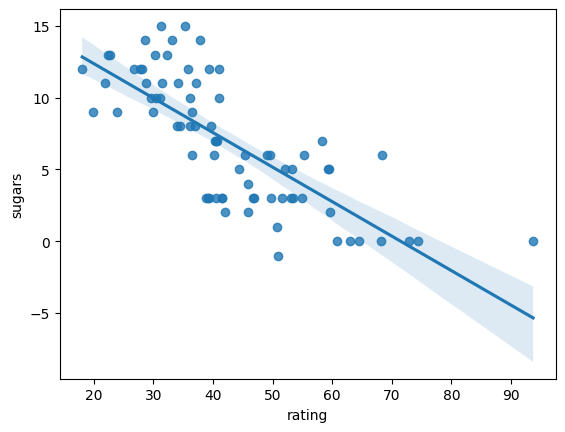

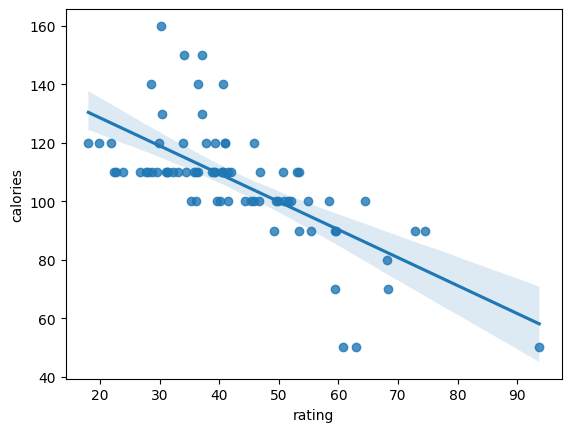

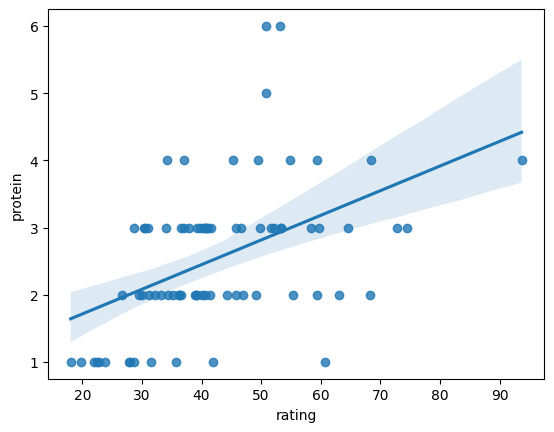

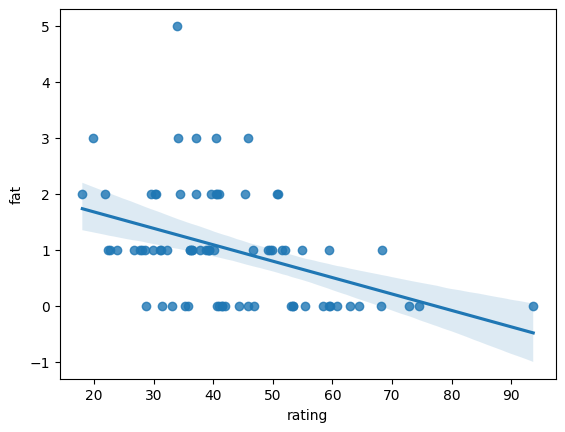

In [51]:
# Write your code to compare the various variables with rating below:

plt.figure()
sns.regplot(data=cereal, x='rating', y='carbo')
print(np.corrcoef(x=cereal['rating'], y=cereal['carbo'])[0][1])

plt.figure()
sns.regplot(data=cereal, x='rating', y='sugars')

plt.figure()
sns.regplot(data=cereal, x='rating', y='calories')
print(np.corrcoef(x=cereal['rating'], y=cereal['calories'])[0][1])

plt.figure()
sns.regplot(data=cereal, x='rating', y='protein')
print(np.corrcoef(x=cereal['rating'], y=cereal['protein'])[0][1])


plt.figure()
sns.regplot(data=cereal, x='rating', y='fat')
print(np.corrcoef(x=cereal['rating'], y=cereal['fat'])[0][1])


Of the variables carbo, sugars, calories, protein, and fat, which has the strongest relationship with rating? Justify your answer.

The rating and sugars variables have the strongest relationship. It has an r value of -0.76 and the next closest is calories with -0.69. As you can see from the graphs, the only ones with a clear correclation are 'sugar vs. rating' and then 'calories vs. rating' then by the calculated r value you can see that r is a tenth more correlated whish is significant.

## Exercise 6: Preparing for Mt. Everest
Do the same as you did with exercise 5, but instead compare carbo, sugars, protein, and fat with calories.

0.2506809146989276
0.2506809146989276
0.019066068232357035
0.49860981430038764


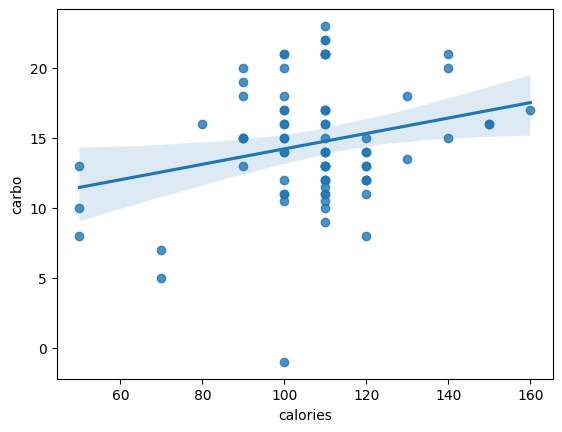

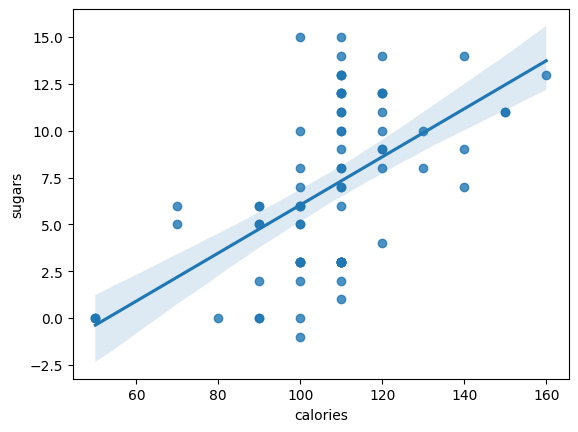

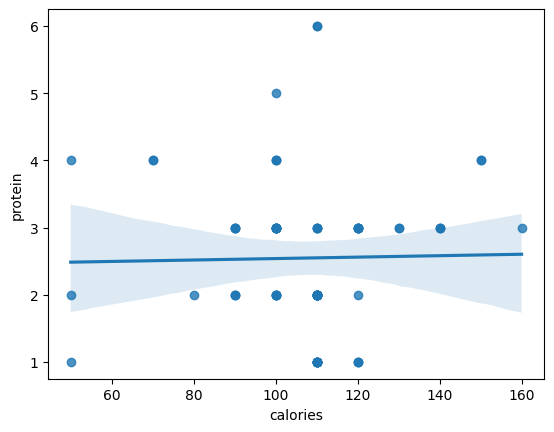

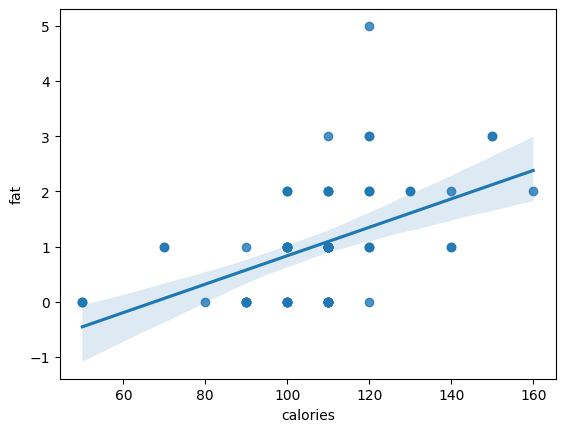

In [52]:
# Write your code to compare the various variables with calories below:
x = 'calories'

plt.figure()
sns.regplot(data=cereal, x=x, y='carbo')
print(np.corrcoef(x=cereal[x], y=cereal['carbo'])[0][1])

plt.figure()
sns.regplot(data=cereal, x=x, y='sugars')
print(np.corrcoef(x=cereal[x], y=cereal['carbo'])[0][1])

plt.figure()
sns.regplot(data=cereal, x=x, y='protein')
print(np.corrcoef(x=cereal[x], y=cereal['protein'])[0][1])

plt.figure()
sns.regplot(data=cereal, x=x, y='fat')
print(np.corrcoef(x=cereal[x], y=cereal['fat'])[0][1])

Of the variables carbo, sugars, protein, and fat, which has the strongest relationship with calories? Justify your answer.

The macronutrient with the strongest correlation to calories is fat. It is not a very strong correlation but its about 2x as strong as the next one.

## Exercise 7: It’s Hot and It's Cold
The type column has two values: H='hot' and C='cold'. What is the average rating of each type?

In [61]:
# Write your code to get the average rating by type of cereal below:
hot = cereal[cereal["type"].isin(["H"])]
hot_rate = hot['rating'].mean()

cold = cereal[cereal["type"].isin(["C"])]
cold_rate = cold['rating'].mean()

print(hot_rate, cold_rate)

56.73770833333334 42.09521836486486


## Exercise 8: Captain Crunch the Numbers
Provide one additional insight from this dataset that you found interesting. Create at least one figure and explain why the figure was interesting to you.

<Axes: xlabel='rating'>

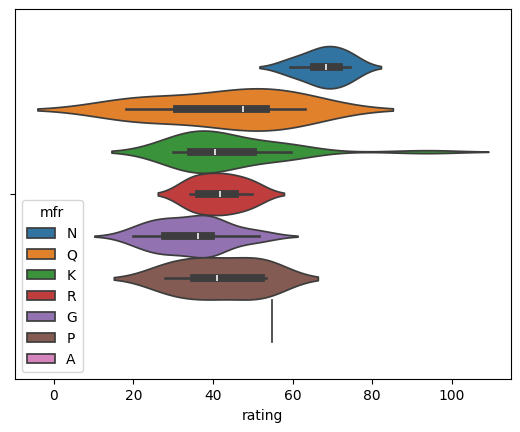

In [62]:
# Create the extra plot below:
sns.violinplot(data=cereal, x='rating', hue='mfr')

Apparently Nestle is the highest rated cereal by far, they seem to make fewer cereals but they make them well I guess. On the other hand, Kellog makes some of the best cereals, unreasonably so, but most of their cereals are not that good. Quaker is the opposite of Kellog, it has some cereals that fall down to the bottom of the charts but usually make pretty good cereals. I feel like all of this information is the opposite of what I would have expcted. really just interested to learn eerything that we have learned in this lab.